In [7]:
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import LinearRegression
import pandas as pd
import os
from misc.utils import MyUtils


In [8]:
data_path = "./prog4/code_linear_regression/houseprice"

X_train = MyUtils.normalize_neg1_pos1(pd.read_csv(os.path.join(data_path, "x_train.csv")).to_numpy())
X_test = MyUtils.normalize_neg1_pos1(pd.read_csv(os.path.join(data_path, "x_test.csv")).to_numpy())
y_train = MyUtils.normalize_neg1_pos1(pd.read_csv(os.path.join(data_path, "y_train.csv")).to_numpy())
y_test = MyUtils.normalize_neg1_pos1(pd.read_csv(os.path.join(data_path, "y_test.csv")).to_numpy())

In [31]:
lr = LinearRegression()

# configure hyperparameters
max_degree = 5
gd = False
lam = 1 # TODO: implement this
epochs = 10_000
eta = 0.01

Now we will calculate and store our metric data 

In [32]:
degree_x = [] # store each degree
mse_val_y = [] # store the validation error for each degree
mse_train_y = [] # store the training error for each degree
prediction_y = [] # store the predictions for each degree

for r in range(1, max_degree + 1):  # 1-based indexing
    if gd: 
        lr.fit(X=X_train, y=y_train, CF=False, epochs=epochs, eta=eta, degree=r)
    else:
        lr.fit(X=X_train, y=y_train, CF=True, degree=r)

    validaiton_mse = lr.error(X=X_test, y=y_test)
    training_mse = lr.error(X=X_train, y=y_train)
    
    print(f"MSE for degree {r}:\nTest: {validaiton_mse}\nTrain: {training_mse}\n")

    y_hat = lr.predict(X=X_test)

    degree_x.append(r)
    mse_val_y.append(validaiton_mse)
    mse_train_y.append(training_mse)
    prediction_y.append(y_hat) 

MSE for degree 1:
Test: 0.07432668681794431
Train: 0.043573224746698815

MSE for degree 2:
Test: 0.11643174485039647
Train: 0.011032427181291294

MSE for degree 3:
Test: 950.9979603803324
Train: 6.067896116737198e-15

MSE for degree 4:
Test: 8.481793287202883
Train: 1.8567399178142948e-21

MSE for degree 5:
Test: 3.922120405631757
Train: 3.480854582351706e-09



## Plotting Predicted vs. True House Price 

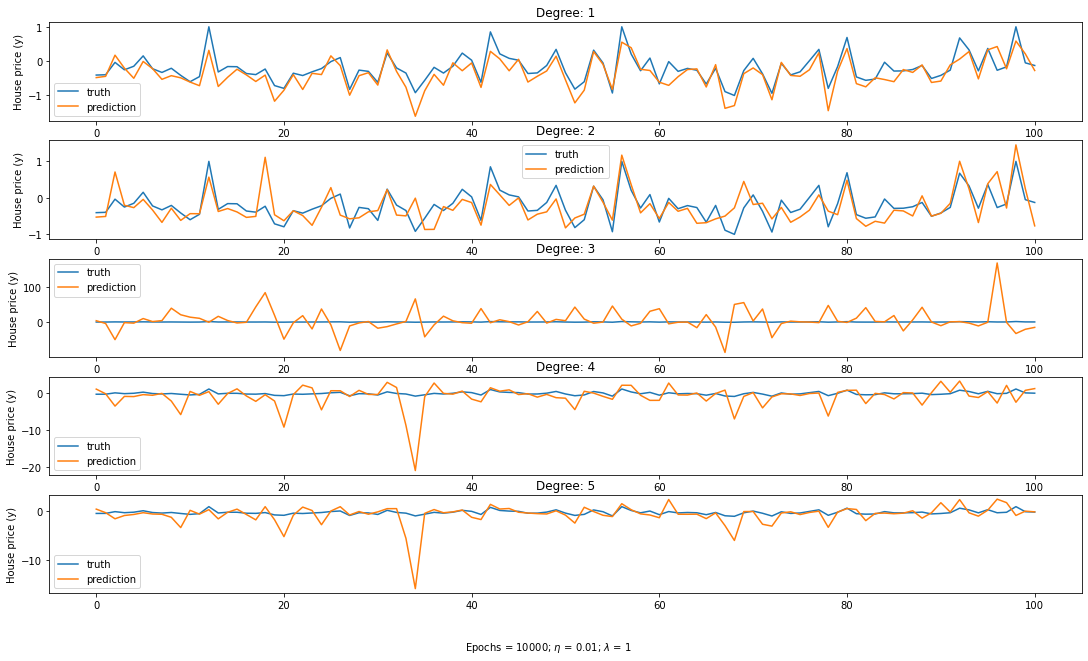

In [33]:
# plot to examine the true y vs. predicted y for each degree
prediction_fig, pred_axes = plt.subplots(len(degree_x))

# figure config
prediction_fig.set_size_inches(18.5, 10.5)
prediction_fig.text(.5, .05, f"Epochs = {epochs}; $\eta$ = {eta}; $\lambda$ = {lam}", ha='center')

# x-vals for prediction_fig subplots
prediction_fig_x = np.arange(y_test.shape[0])

for i, (degree, prediction) in enumerate(zip(degree_x, prediction_y)):
    ax_pred = pred_axes[i]

    ax_pred.set_title(f"Degree: {degree}")
    ax_pred.set_ylabel("House price (y)")

    # plot truth and prediction
    ax_pred.plot(prediction_fig_x, y_test.flatten())
    ax_pred.plot(prediction_fig_x, prediction.flatten())
    ax_pred.legend(["truth", "prediction"])

plt.show()

## Plotting Degree vs. Error

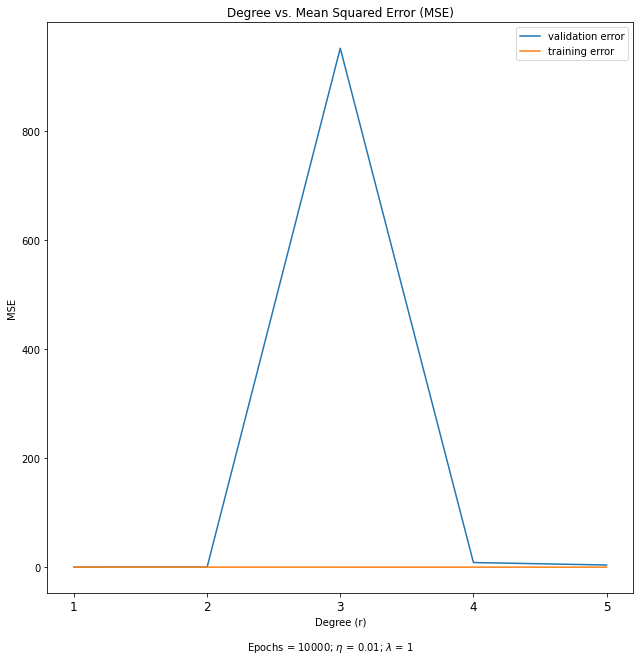

In [34]:
error_fig, error_ax = plt.subplots(1)

error_ax.plot(degree_x, mse_val_y)
error_ax.plot(degree_x, mse_train_y)

# figure config
error_fig.set_size_inches(10.5, 10.5)
error_fig.text(.5, .05, f"Epochs = {epochs}; $\eta$ = {eta}; $\lambda$ = {lam}", ha='center')


# plot config
error_ax.set_title(f"Degree vs. Mean Squared Error (MSE)")
error_ax.set_ylabel("MSE")
error_ax.set_xlabel("Degree (r)")
error_ax.legend(["validation error", "training error"])
error_ax.set_xticks(degree_x)
error_ax.set_xticklabels(degree_x, fontsize=12)


plt.show()